# First Exploratory Data Analysis

O objetivo é analisar e investigar o dataset construído para, ao final, ser capaz de resumir suas principais características.

In [1]:
import os; os.chdir("..")

In [2]:
import pandas as pd; pd.set_option("max.rows", 4000); pd.set_option("max.columns", 4000)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import os
%matplotlib inline

In [4]:
from equity_research.build_us_equity_database import EquityResearchUS

## 1. Loading and Cleaning Dataset

In [5]:
equity_us = EquityResearchUS(prices_file="default_yahoo_prices.csv", financial_statements_file="equities_database.csv", name_to_save_DB="equities_database.csv")
dataset = equity_us.build_dataset()

[INFO] Calculating primary features...


  1%|▌                                                                               | 14/2108 [00:00<00:29, 71.25it/s]

[INFO] Calculating delta features...


100%|█████████████████████████████████████████████████████████████████████████████| 2108/2108 [00:20<00:00, 102.45it/s]


In [6]:
dataset.head()

,total_equity,dividend_yield,earning_per_shares,gross_profit,price_to_earnings_ratio,price_to_book_ratio,price_to_sales_ratio,dividend_per_shares,current_ratio,quick_ratio,debt_equity_ratio,profit_margin,operating_margin,asset_turnover,return_on_asset,ROE,CR,EM,long_term_debt/total_assets,WCR,return,Ticker,fiscal_date
1,0.043247,0.0,0.248465,0.125106,-0.424646,-0.311467,-0.307906,0.0,-0.041654,-0.026309,0.082515,0.202901,0.103916,-0.014326,0.185668,0.196711,-0.551762,-0.227238,-0.054890,-0.041654,0.049020,NWPX,1999-09-30
2,0.041122,0.0,-0.046843,-0.034353,0.100573,0.007585,0.136595,0.0,0.112776,0.084435,-0.202135,0.032730,0.115808,-0.051842,-0.020809,-0.084491,-0.046180,-0.044999,0.052356,0.112776,0.014019,NWPX,1999-12-31
3,0.024298,0.0,-0.358947,-0.105321,0.589090,-0.005473,-0.069629,0.0,-0.078990,-0.151956,0.238826,-0.414526,-0.327982,0.014171,-0.406229,-0.374153,-0.596614,0.459315,-0.075081,-0.078990,-0.066514,NWPX,2000-03-31
4,0.031649,0.0,0.298179,0.117544,-0.257958,-0.066249,-0.112927,0.0,-0.066751,-0.088616,0.160846,0.195449,0.123332,0.017961,0.216921,0.258353,-0.178454,-0.151952,-0.081921,-0.066751,-0.200000,NWPX,2000-06-30
6,0.025915,0.0,-0.138336,-0.024110,-0.093669,-0.238775,-0.285811,0.0,0.102449,0.235908,-0.025428,-0.211999,-0.117921,0.080718,-0.148394,-0.160102,7.958506,-0.064589,-0.002050,0.102449,0.079268,NWPX,2000-09-30


## 1.1 Dataset Info

O dataset apresenta 60000 observações não nulas. O tratamento de valores ausentes e infinitos foi feito tratando-os como zero. Assim, se uma observação apresenta uma variação percentual infinita (pois não há observação anterior), então considerou-se a variação da feature como zero. É uma aproximação que pode ser mudada a critério do desenvolvimento do modelo.

In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55331 entries, 1 to 64669
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   total_equity                 55331 non-null  float64
 1   dividend_yield               55331 non-null  float64
 2   earning_per_shares           55331 non-null  float64
 3   gross_profit                 55331 non-null  float64
 4   price_to_earnings_ratio      55331 non-null  float64
 5   price_to_book_ratio          55331 non-null  float64
 6   price_to_sales_ratio         55331 non-null  float64
 7   dividend_per_shares          55331 non-null  float64
 8   current_ratio                55331 non-null  float64
 9   quick_ratio                  55331 non-null  float64
 10  debt_equity_ratio            55331 non-null  float64
 11  profit_margin                55331 non-null  float64
 12  operating_margin             55331 non-null  float64
 13  asset_turnover  

In [8]:
dataset.describe()

,total_equity,dividend_yield,earning_per_shares,gross_profit,price_to_earnings_ratio,price_to_book_ratio,price_to_sales_ratio,dividend_per_shares,current_ratio,quick_ratio,debt_equity_ratio,profit_margin,operating_margin,asset_turnover,return_on_asset,ROE,CR,EM,long_term_debt/total_assets,WCR,return
count,5.533100e+04,55331.000000,5.533100e+04,5.533100e+04,55331.000000,55331.000000,55331.000000,55331.000000,55331.000000,55331.000000,55331.000000,55331.000000,55331.000000,5.533100e+04,5.533100e+04,5.533100e+04,55331.000000,55331.000000,55331.000000,55331.000000,55331.000000
mean,-1.888581e+01,13.028941,3.311517e+01,1.920536e+01,1.608768,8.102929,14.692256,15.423334,0.262239,0.268600,0.069435,2.085529,-0.559820,3.933035e+01,5.383370e+02,5.642163e+02,2.632069,2.897907,1.788327,0.262239,0.051008
std,9.160913e+03,3828.781508,7.771654e+03,4.427726e+03,425.213914,2813.127055,3242.369378,4332.526895,22.512226,21.869690,6.045826,444.227961,135.293352,6.486490e+03,1.188517e+05,1.254107e+05,298.069608,609.893455,260.410911,22.512226,2.510714
min,-1.957706e+06,-208226.952543,-1.849388e+04,-2.364429e+03,-39405.380361,-192858.150574,-999.484251,-200244.717365,-1.000000,-1.000000,-556.932084,-4812.684725,-26793.646811,-2.820080e+02,-9.127320e+03,-1.066637e+04,-1.000000,-3437.261376,-1.000000,-1.000000,-1.000000
25%,-2.474498e-02,-0.016066,-5.766017e-01,-7.946667e-02,-0.580561,-0.102191,-0.116906,0.000000,-0.082559,-0.096954,-0.095916,-0.580703,-0.298797,-7.505624e-02,-5.841723e-01,-6.192566e-01,-0.184119,-0.344002,-0.036503,-0.082559,-0.071127
50%,1.278765e-02,0.000000,-6.554057e-02,1.404360e-02,-0.093644,0.011215,0.005152,0.000000,-0.002156,-0.002378,0.001464,-0.063355,-0.019913,0.000000e+00,-8.208270e-02,-8.921481e-02,-0.003109,-0.036808,0.000000,-0.002156,0.024358
75%,4.633178e-02,0.000000,2.949713e-01,1.105870e-01,0.312209,0.126569,0.147386,0.000585,0.077363,0.092122,0.113826,0.241393,0.169938,7.044341e-02,2.803531e-01,2.971734e-01,0.208941,0.254040,0.017758,0.077363,0.119554
max,9.004433e+05,875608.490783,1.827906e+06,1.041468e+06,90221.150681,632980.347149,762620.576696,998660.311914,4316.912702,4316.912702,822.354780,102415.718016,11299.174331,1.154830e+06,2.789817e+07,2.945035e+07,53189.156459,142484.547956,60503.043373,4316.912702,412.666671


## 1.2 Tratamento de Outliers

Retirar tudo que for maior do que 3 desvios padrão.

In [9]:
'''
trava muito
for column in dataset.columns.tolist()[:-2]:
    fig = px.box(dataset, y=column)
    fig.show()
''';

In [10]:
m=3
for column in dataset.columns.tolist()[:-2]:
    dataset = dataset[np.abs(dataset[column]-dataset[column].mean()) <= (m*dataset[column].std())]

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51195 entries, 1 to 64669
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   total_equity                 51195 non-null  float64
 1   dividend_yield               51195 non-null  float64
 2   earning_per_shares           51195 non-null  float64
 3   gross_profit                 51195 non-null  float64
 4   price_to_earnings_ratio      51195 non-null  float64
 5   price_to_book_ratio          51195 non-null  float64
 6   price_to_sales_ratio         51195 non-null  float64
 7   dividend_per_shares          51195 non-null  float64
 8   current_ratio                51195 non-null  float64
 9   quick_ratio                  51195 non-null  float64
 10  debt_equity_ratio            51195 non-null  float64
 11  profit_margin                51195 non-null  float64
 12  operating_margin             51195 non-null  float64
 13  asset_turnover  

# 2. Estudo das Distribuições

In [12]:
dataset.describe()

,total_equity,dividend_yield,earning_per_shares,gross_profit,price_to_earnings_ratio,price_to_book_ratio,price_to_sales_ratio,dividend_per_shares,current_ratio,quick_ratio,debt_equity_ratio,profit_margin,operating_margin,asset_turnover,return_on_asset,ROE,CR,EM,long_term_debt/total_assets,WCR,return
count,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000,51195.000000
mean,0.146747,0.082619,-0.090991,0.066442,-0.026046,0.026627,0.082306,0.086968,-0.002538,0.001999,0.034402,-0.120689,-0.045770,0.024686,-0.114932,-0.123040,0.166639,0.008157,0.063595,-0.002538,0.031550
std,14.332645,2.650790,2.107820,2.140901,23.260943,0.495933,1.280757,2.567596,0.186347,0.221523,0.525528,2.177286,5.610836,0.799894,1.582531,1.582906,1.604013,5.477347,1.329222,0.186347,0.252316
min,-1539.544884,-91.246199,-50.500693,-114.416667,-1200.694789,-14.485186,-63.020093,-98.691503,-0.784840,-0.919445,-15.828206,-67.291180,-200.844810,-27.962980,-13.457250,-8.875341,-1.000000,-138.663476,-1.000000,-0.784840,-1.000000
25%,-0.021973,-0.019435,-0.534699,-0.076544,-0.482425,-0.096609,-0.111588,0.000000,-0.082911,-0.097845,-0.089149,-0.537358,-0.284136,-0.071919,-0.540904,-0.564680,-0.185223,-0.304798,-0.036407,-0.082911,-0.069193
50%,0.013146,0.000000,-0.064087,0.014164,-0.064470,0.012291,0.007310,0.000000,-0.004405,-0.005152,0.002628,-0.064183,-0.020887,0.000000,-0.077472,-0.083895,-0.008661,-0.025928,0.000000,-0.004405,0.024766
75%,0.045114,0.000000,0.268442,0.106573,0.337169,0.124630,0.144980,0.000776,0.067804,0.080321,0.110437,0.215992,0.159264,0.067583,0.255866,0.272593,0.184108,0.263050,0.016074,0.067804,0.118281
max,1042.574684,246.857255,183.443128,113.266026,1230.736917,18.742279,69.486896,168.590236,0.823862,2.739663,17.713262,71.383869,202.718910,30.189316,17.174895,8.628182,65.459173,136.618651,63.739378,0.823862,6.699946


# 2.1 Boxplots

<ipython-input-13-cd2201cf6061>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure();


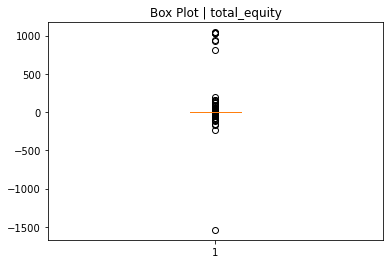

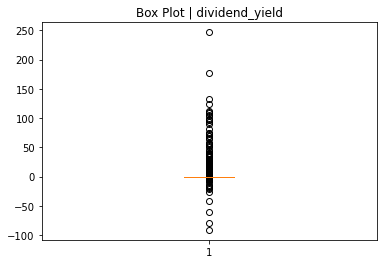

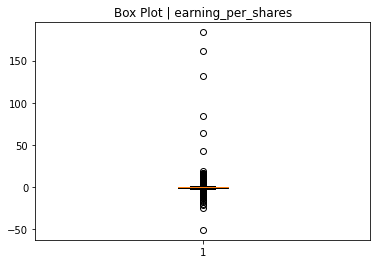

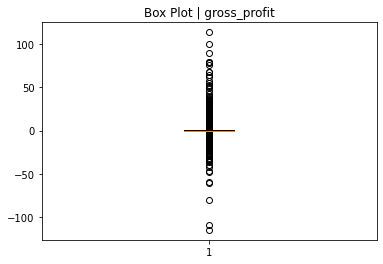

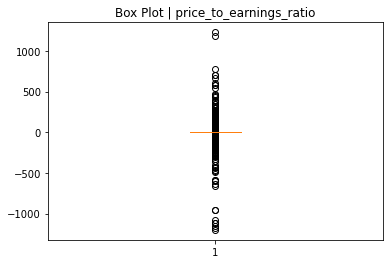

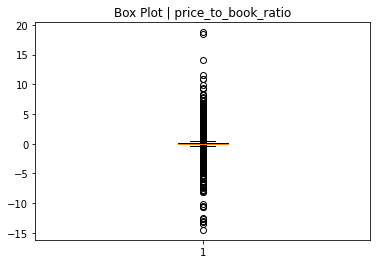

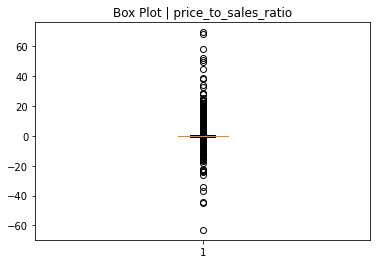

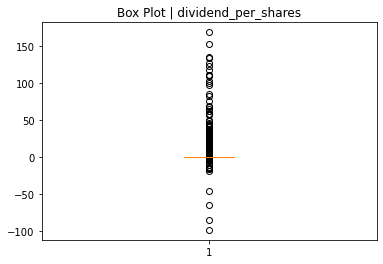

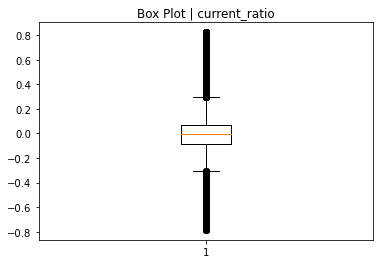

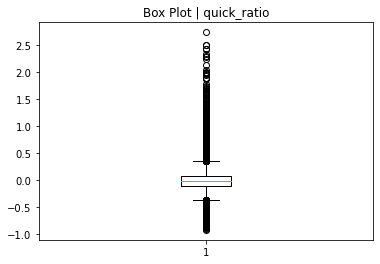

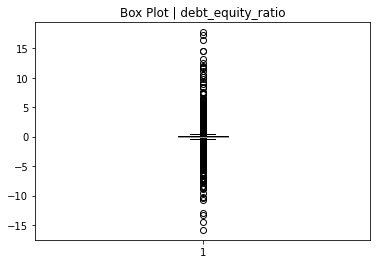

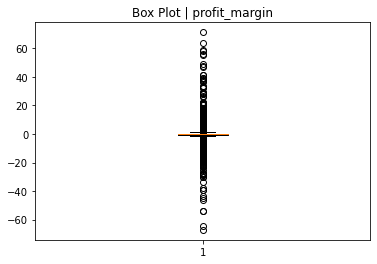

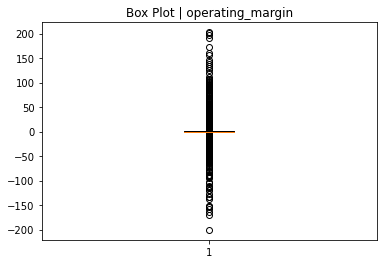

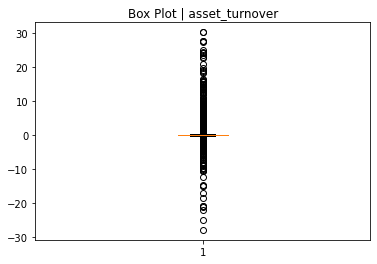

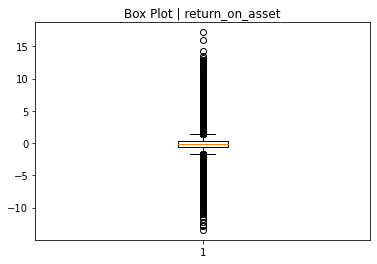

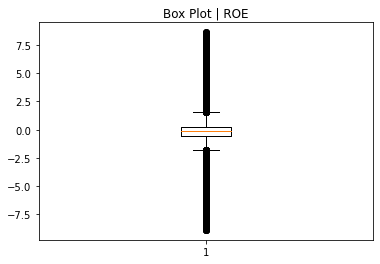

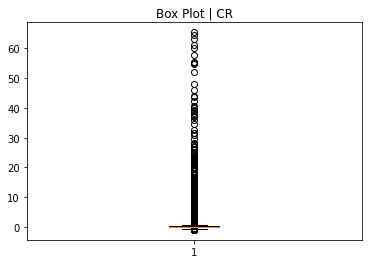

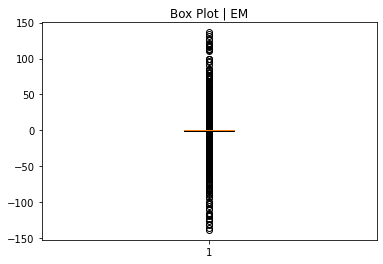

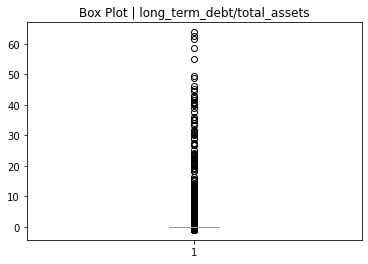

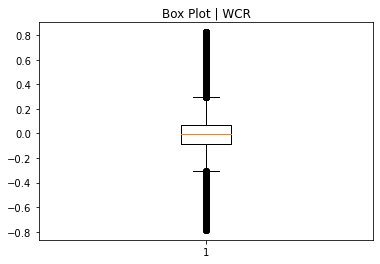

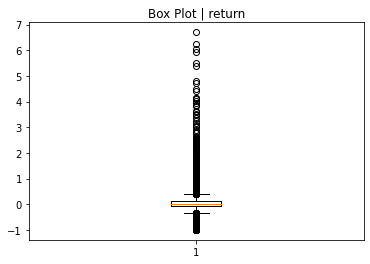

In [13]:
for column in dataset.columns.tolist()[:-2]:
    plt.figure();
    plt.title(f"Box Plot | {column}");
    plt.boxplot(dataset[column])

# 2.2 Histogramas

<ipython-input-14-6fc3b22dc9c9>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure();


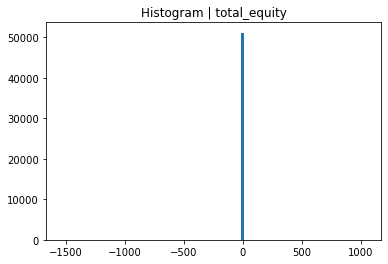

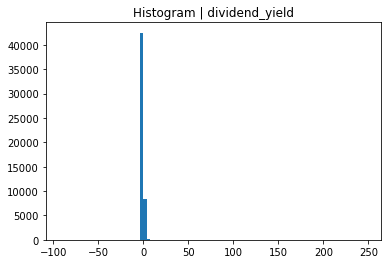

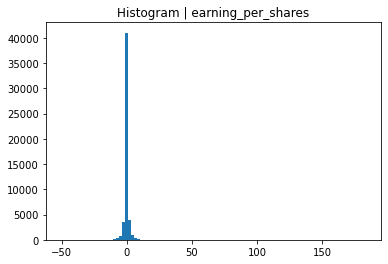

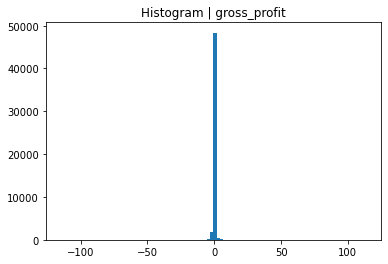

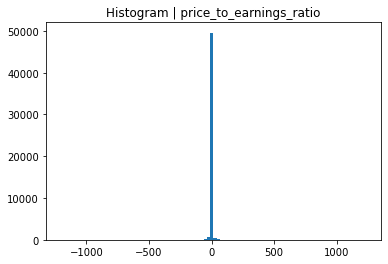

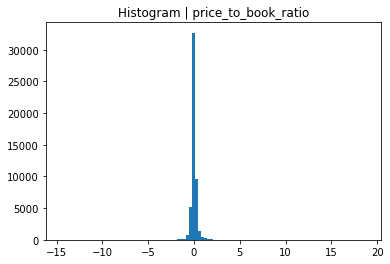

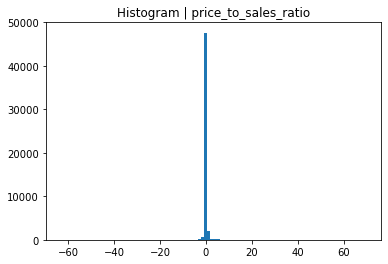

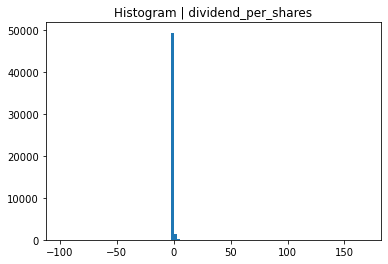

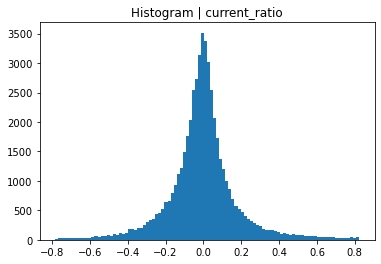

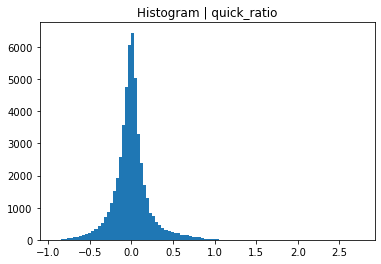

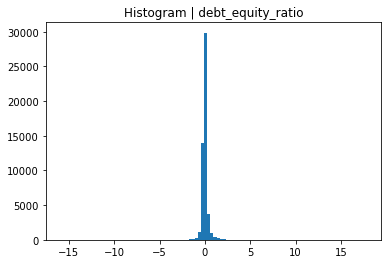

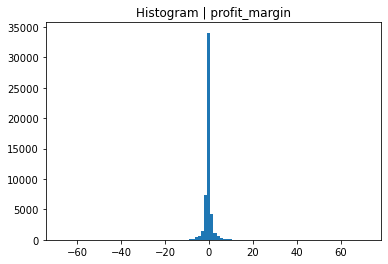

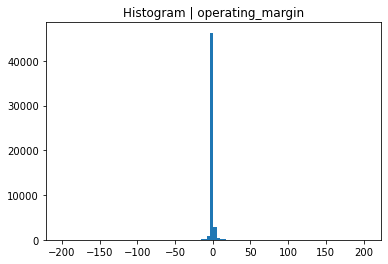

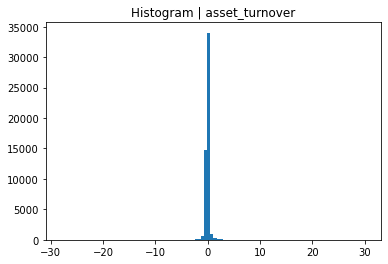

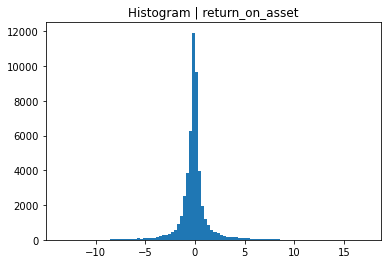

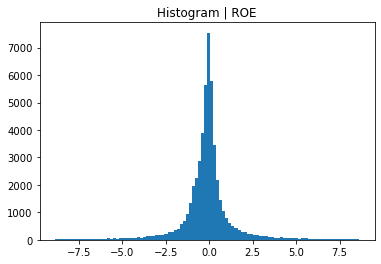

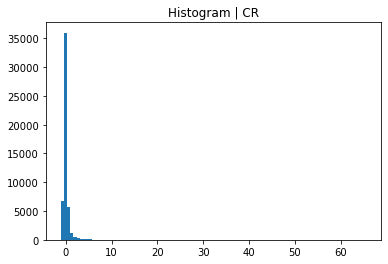

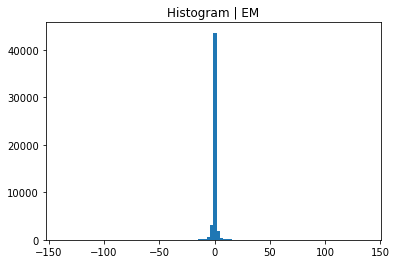

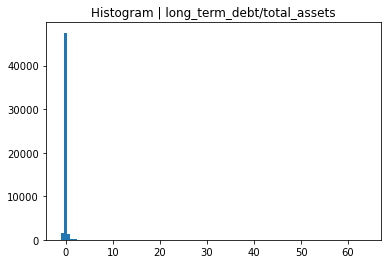

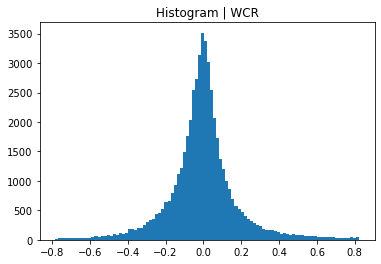

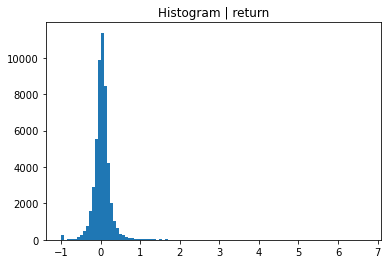

In [14]:
for column in dataset.columns.tolist()[:-2]:
    plt.figure();
    plt.title(f"Histogram | {column}");
    plt.hist(dataset[column], bins=100)

# 3. Estudo das Correlações

- Verificar multicolinearidades entre as variáveis dependentes

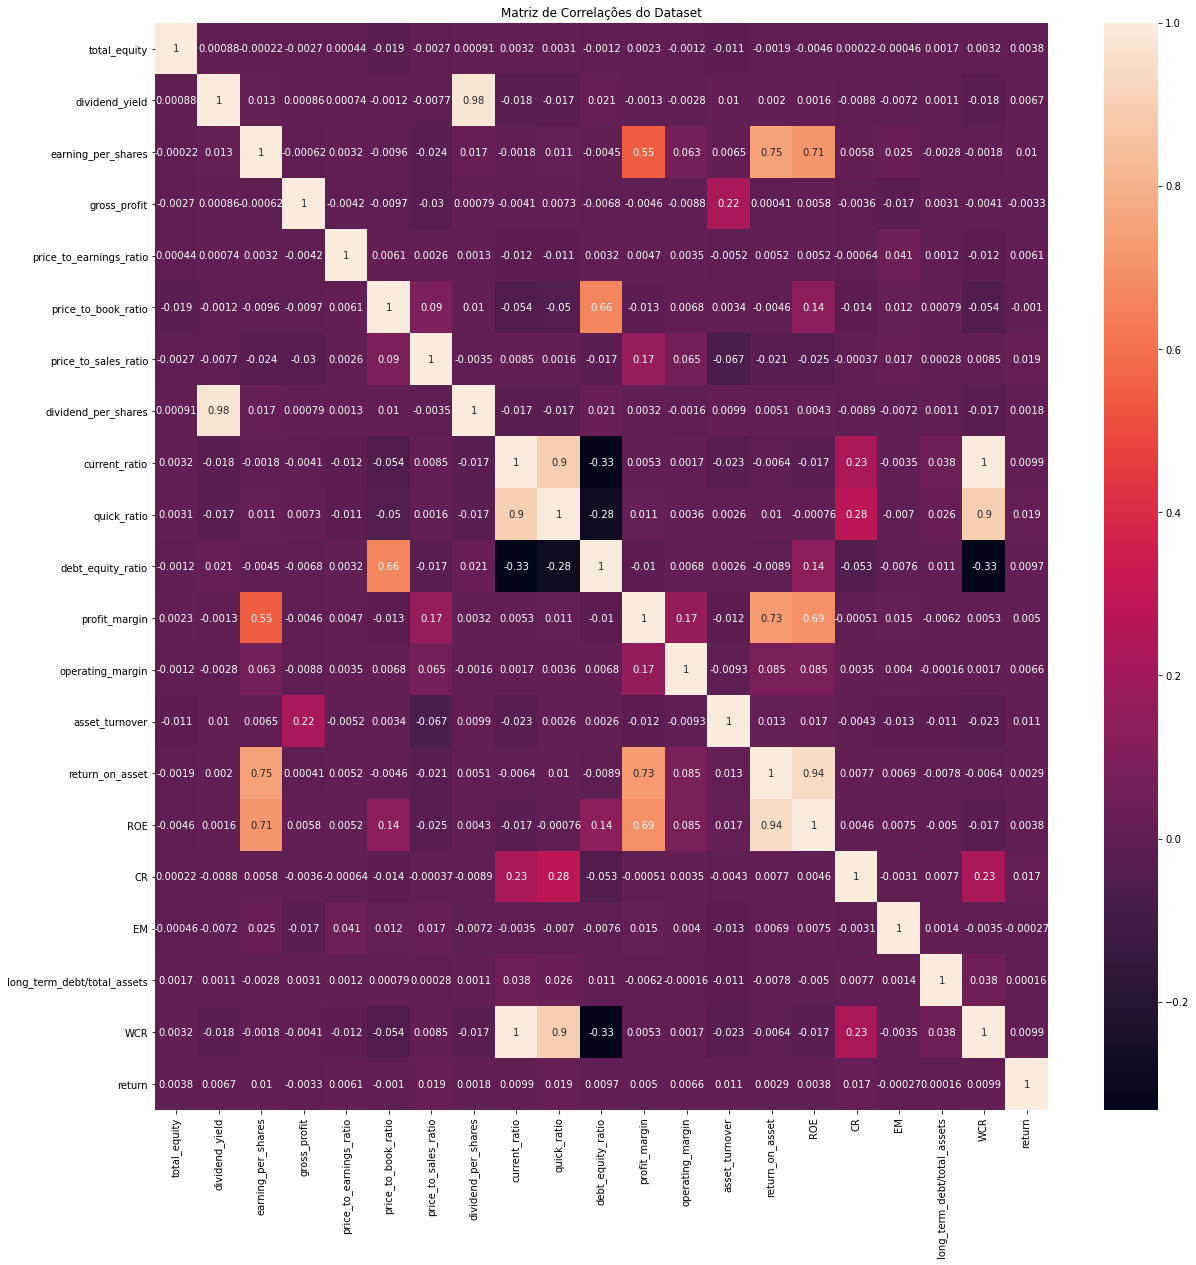

In [15]:
plt.figure(figsize=(20,20));
sns.heatmap(dataset.corr(), annot=True);
plt.title("Matriz de Correlações do Dataset");

In [16]:
#pd.plotting.scatter_matrix(dataset, alpha=0.2, figsize=(30,30));

# 4. Modelo de Regressão

In [17]:
from xgboost import XGBRegressor

In [18]:
dataset.drop(['fiscal_date', 'Ticker'],axis=1,inplace=True)

In [19]:
X_train = dataset[:int(dataset.shape[0]*0.7)].copy()
X_test = dataset[int(dataset.shape[0]*0.7):].copy()

In [20]:
y_train = X_train['return']
y_test = X_test['return']

In [21]:
X_train.drop(["return"], axis=1, inplace=True)

In [22]:
X_test.drop(["return"], axis=1, inplace=True)

In [23]:
model = XGBRegressor(gamma=0.0, learning_rate=0.05, n_estimators=300)

In [24]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
print(mean_squared_error(y_test, y_pred))

0.11882900739370755


In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test, y_pred)

-0.09599695336196734

# 5. Modelo de Classificação

In [30]:
dataset['label'] = dataset['return'] > 0.10
dataset['label'] = dataset['label'].astype(int)

In [31]:
dataset.drop(["return"], axis=1, inplace=True)

In [32]:
X_train = dataset[:int(dataset.shape[0]*0.7)].copy()
X_test = dataset[int(dataset.shape[0]*0.7):].copy()

In [33]:
y_train = X_train['label']
y_test = X_test['label']

In [34]:
X_train.drop(["label"], axis=1, inplace=True)
X_test.drop(["label"], axis=1, inplace=True)

<AxesSubplot:>

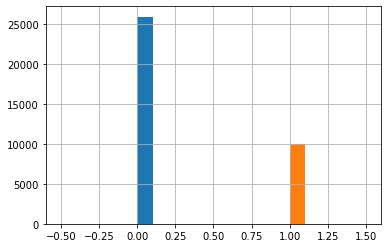

In [35]:
y_train[y_train == 0].hist()
y_train[y_train == 1].hist()

<AxesSubplot:>

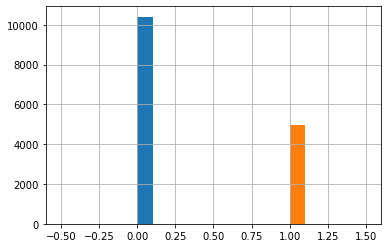

In [36]:
y_test[y_test == 0].hist()
y_test[y_test == 1].hist()

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
scaler.fit(X_train)

MinMaxScaler()

In [40]:
X_train_esc = scaler.transform(X_train)

In [41]:
X_test_esc = scaler.transform(X_test)

In [42]:
from keras.models import Sequential
from keras.layers import Dense
import keras

In [43]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
#model.fit(X_train_esc, y_train, epochs=20, batch_size=5)

In [46]:
y_pred = model.predict(X_test)

In [48]:
from ann_visualizer.visualize import ann_viz;
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'

ann_viz(model, title="Fundamentalist Network", view=True)

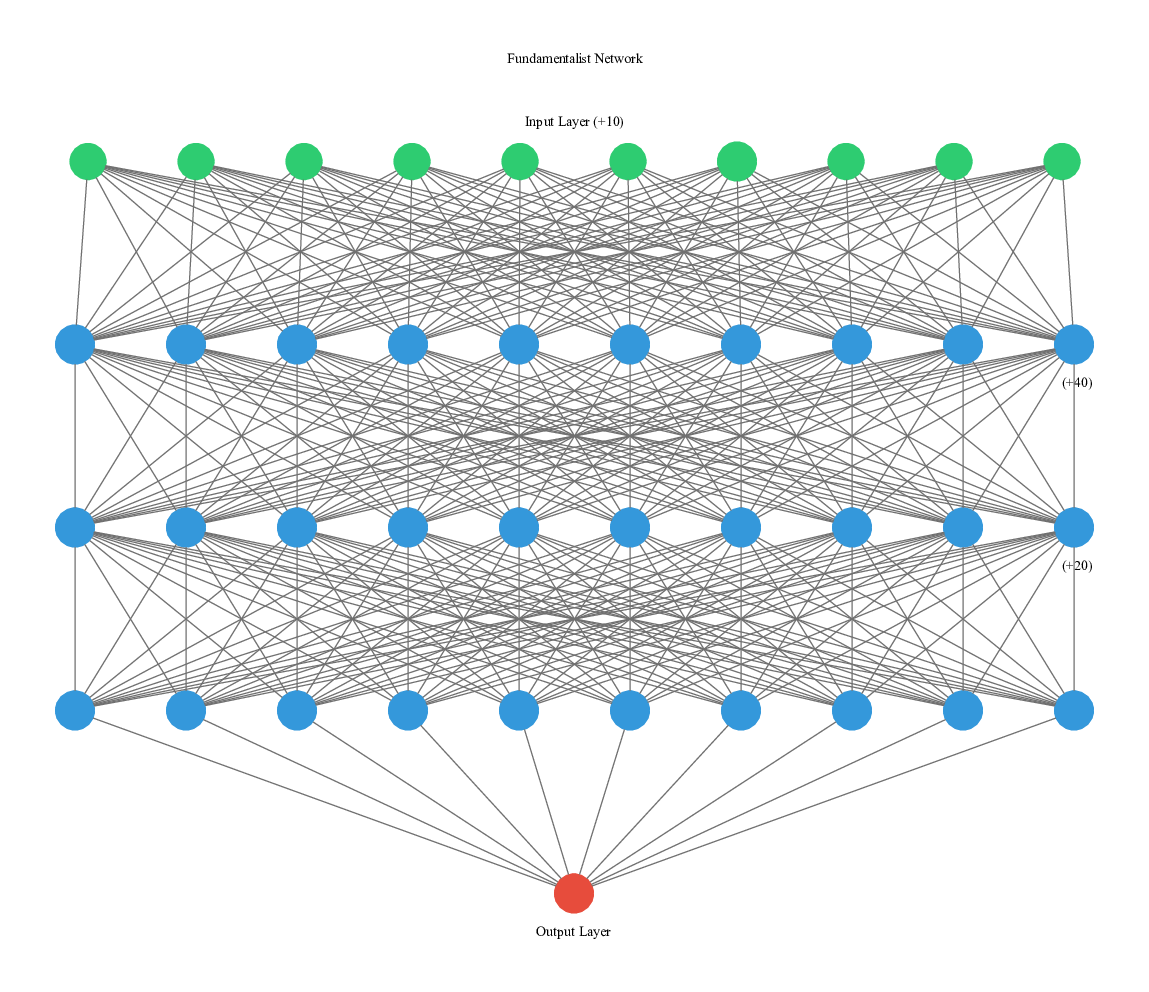

In [53]:
from wand.image import Image as WImage
img = WImage(filename='network.gv.pdf')
img